In [37]:
import numpy as np
from scipy.special import lambertw

In [38]:
Voc=17.705;
Vmpp=13.42;
Isc=0.6246;
Impp=0.5242;
Ns=36;
########################

Voc=32.83;
Vmpp=25.08;
Isc=6.782;
Impp=6.1958
Ns=60;
########################

k = 1.380649*10**(-23);#(*J/\[Degree]K cons. Bolsman*)
q = 1.602176634*10**(-19);#(*Coulums*)
def Vth(T):
    return T*k/q

gi=Impp/Isc;
gv=Vmpp/Voc;
r=gi*(1-gv)/(gv*(1-gi));
SPR=(1-gi)/np.exp(-r);
if SPR>=1:
    Rs=(Voc/Isc)*((gv/gi)*(1-gi)*np.log(1-gi)+(1-gv))/((1-gi)*np.log(1-gi)+gi);
    Rp=1e10;
    print("Rs = ",Rs)
else:
    Rs=1e-10;
    l1=((1-gv)/(1-gi))*((2*gi-1)/(gi+gv-1));
    l2=gv/(1-gi);
    w=lambertw(-SPR*l1*np.exp(-l1),-1).real;
    Rp=(Voc/Isc)*(l2*w+l1)/(w+l1);
    print("Rp = ",Rp)

n=(Impp*Rs-(Voc-Vmpp))/np.log(((Isc-Impp)*(Rs+Rp)-Vmpp)/(Isc*(Rs+Rp)-Voc));
Iph=Isc*(Rs+Rp)/Rp; #(24)
I0=(Isc-Voc/Rp)*np.exp(-Voc/n); #(12)
Tn = 25 + 273.15;

print("n = ",n)
print("Iph = ",Iph)
print("I0 = ",I0)
print("Vt = ",Vth(Tn))
print(Tn)

Rs =  0.40758126121651417
n =  2.133956845260117
Iph =  6.782000000276422
I0 =  1.4122957432046823e-06
Vt =  0.025692579121085846
298.15


In [58]:
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
from scipy.special import lambertw
import time

In [59]:
def Isc_eq(i):
    return Iph-I0*(np.exp(i*Rs/(n*Vth(Tn)*Ns))+1)-i
Isc = fsolve(Isc_eq, 1)[0]
Voc=np.log(Iph/I0)*(n*Vth(Tn)*Ns)
print("Isc = ", Isc)
print("Voc = ", Voc)

Isc =  6.781995315649825
Voc =  50.6092423544414


Tiempo empleando el método numerico:  0.021820545196533203
Tiempo empleando la función W de lambert:  0.00039839744567871094


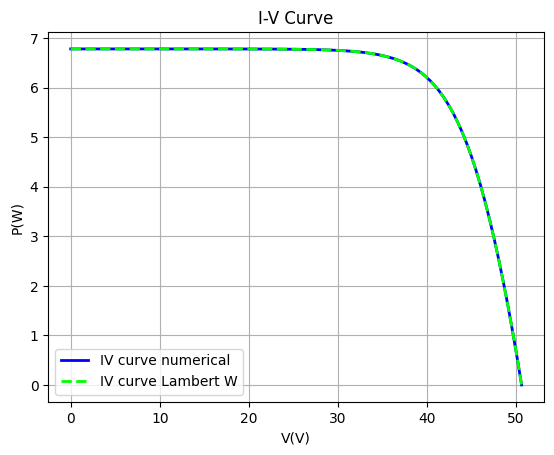

<Figure size 640x480 with 0 Axes>

In [61]:
N=100
V=np.linspace(0,Voc,N)
I=np.zeros(N)
Iw=np.zeros(N)

inicio = time.time()
def I_eq(i):
    return Iph-I0*(np.exp((i*Rs+Vm)/(n*Vth(Tn)*Ns))+1)-i
for f in range(0,N):
    Vm=V[f]
    I[f] = fsolve(I_eq, Iph)[0]
fin = time.time()
print("Tiempo empleando el método numerico: ",fin-inicio) 

inicio = time.time()
Iw=Iph-(n*Vth(Tn)*Ns)*(lambertw(I0*Rs*np.exp((V+Rs*Iph)/(n*Vth(Tn)*Ns))/(n*Vth(Tn)*Ns)).real)/Rs
fin = time.time()
print("Tiempo empleando la función W de lambert: ",fin-inicio) 

plt.plot(V,I,'-',color="blue",label="IV curve numerical", markersize=6,linewidth=2.0)
plt.plot(V,Iw,'--',color="lime",label="IV curve Lambert W", markersize=6,linewidth=2.0)
plt.title("I-V Curve");
plt.xlabel("V(V)");
plt.ylabel("P(W)");
plt.grid()
plt.legend()



fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig('IV_curve_num_and_W.png',format='png')